# Jonathan Halverson
# Wednesday, October 11, 2017
# Dimensionality reduction

In [1]:
from sklearn.datasets import make_moons

In [24]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [27]:
X, y = make_moons(n_samples=1000, noise=0.1)

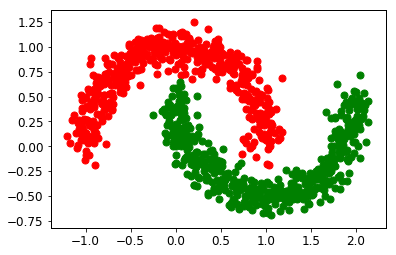

In [28]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], c='r')
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='g')

In [14]:
from sklearn.datasets import make_swiss_roll

In [32]:
X, t = make_swiss_roll(n_samples=1000, noise=0.1)

In [33]:
from mpl_toolkits.mplot3d import Axes3D

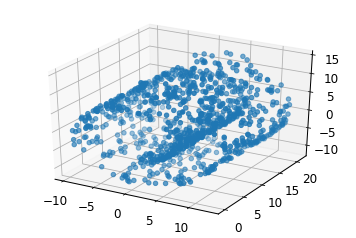

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], zs=X[:,2], zdir='z', s=20, c=None, depthshade=True)